In [1]:
from llm_manager import get_llm_instance
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

F:\GenAI\LangGraph_OpenSource\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. LLM model

In [2]:
llm = get_llm_instance()

Initializing LLM: mistralai/Mistral-7B-Instruct-v0.2...


`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 3/3 [00:13<00:00,  4.49s/it]
Device set to use cuda


LLM initialization complete for mistralai/Mistral-7B-Instruct-v0.2.


F:\GenAI\LangGraph_OpenSource\llm_manager.py:29: UserWarning: LLMManager is already initialized. Returning existing instance.
  warnings.warn("LLMManager is already initialized. Returning existing instance.")


# 2. Output Parser

In [3]:
output_parser = StrOutputParser()

# 3. State Define

In [4]:
class QuesAnsState(TypedDict):
    ques: str
    ans: str

# 4. Node Define

In [5]:
def ques_ans_generate(state: QuesAnsState):
    # extract the question from the state
    ques = state['ques']
    
    # prompt engineering
    prompt = PromptTemplate(
        template="""
            Answer the following question: \n {question}
        """, input_variables=['question']
    )
    
    # chain build
    chain = prompt | llm | output_parser
    
    # save the answer to the state
    ans = chain.invoke({"question": ques}) 
    return {"ans": ans}

# 5. Create Graph

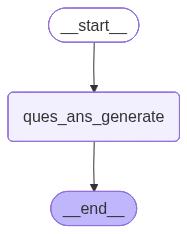

In [6]:
# create graph
graph = StateGraph(QuesAnsState)

# add nodes
graph.add_node('ques_ans_generate',ques_ans_generate)

# add edges
graph.add_edge(START, 'ques_ans_generate')
graph.add_edge('ques_ans_generate', END)

# compile
workflow = graph.compile()
workflow

# 6. Execute

In [7]:
initial_state = {'ques': "Who is the CEO of google"}
final_state = workflow.invoke(initial_state)
print(final_state)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


{'ques': 'Who is the CEO of google', 'ans': '<s> [INST] \n            Answer the following question: \n Who is the CEO of google\n         [/INST] As of my current knowledge up to 2021, the CEO of Alphabet Inc. (which is the parent company of Google) is Sundar Pichai. He has been serving as the CEO since October 2015.'}
